# Crime data in Chicago (January 1, 2010 to December 30, 2019)

In [9]:
import pandas as pd
crime_data = pd.read_csv('2019_data.csv')
crime_data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [10]:
import datetime

cols_to_remove = list(crime_data)

# Separating the date column into month, day, year, and time columns
Months = []
Days   = []
Years  = []
Hours  = []

for row in crime_data['Date']:
    d = datetime.datetime.strptime(row, '%m/%d/%Y %I:%M:%S %p')
    Months.append(d.month)
    Days.append(d.day)
    Years.append(d.year)
    Hours.append(d.hour)
    
crime_data['Month'] = Months
crime_data['Day'] = Days
crime_data['Year'] = Years
crime_data['Hour'] = Hours

crime_data[-4:]

ID Case Number                    Date                Block  \
260404  11938240    JD100002  12/31/2019 11:48:00 PM   004XX S CICERO AVE   
260405  11938857    JD100599  12/31/2019 11:50:00 PM  004XX N Ashland ave   
260406  11940078    JD100016  12/31/2019 11:54:00 PM       063XX S MAY ST   
260407  11938228    JD100017  12/31/2019 11:55:00 PM      0000X W 69TH ST   

        IUCR       Primary Type                     Description  \
260404  143A  WEAPONS VIOLATION        UNLAWFUL POSS OF HANDGUN   
260405  0820              THEFT                  $500 AND UNDER   
260406  0420            BATTERY  AGGRAVATED:KNIFE/CUTTING INSTR   
260407  143A  WEAPONS VIOLATION        UNLAWFUL POSS OF HANDGUN   

          Location Description  Arrest  Domestic  ...  X Coordinate  \
260404  VEHICLE NON-COMMERCIAL    True     False  ...     1144466.0   
260405           BAR OR TAVERN   False     False  ...           NaN   
260406                SIDEWALK   False     False  ...     1169736.0   
260407                  STREET    True     False  ...     1176896.0   

        Y Coordinate  Year              Updated On   Latitude  Longitude  \
260404     1897452.0  2019  01/07/2020 03:52:21 PM  41.874624 -87.745053   
260405           NaN  2019  01/07/2020 03:52:21 PM        NaN        NaN   
260406     1862855.0  2019  01/08/2020 03:47:27 PM  41.779174 -87.653278   
260407     1859260.0  2019  01/07/2020 03:52:21 PM  41.769150 -87.627137   

                             Location  Month Day  Hour  
260404  (41.874623951, -87.745052647)     12  31    23  
260405                            NaN     12  31    23  
260406  (41.779173667, -87.653277703)     12  31    23  
260407  (41.769150218, -87.627136786)     12  31    23  

[4 rows x 25 columns]

In [13]:
# 1-hot encoding for: Arrest, Location Description, Domestic, District, Primary Type, Community Area
discrete_variables = "Arrest, Location Description, Domestic, District, Primary Type, Community Area".split(", ")
print(discrete_variables)
for variable in discrete_variables:
    for dtype in crime_data[variable].dropna().unique():
        if (dtype != "nan"):
            crime_data[variable+"_"+str(dtype)]  = 1*(crime_data[variable] == dtype)

crime_data = crime_data.drop(columns=cols_to_remove)
crime_data[-4:]

['Arrest', 'Location Description', 'Domestic', 'District', 'Primary Type', 'Community Area']


Month  Day  Hour  Arrest_False  Arrest_True  \
260404     12   31    23             0            1   
260405     12   31    23             1            0   
260406     12   31    23             1            0   
260407     12   31    23             0            1   

        Location Description_APARTMENT  Location Description_RESIDENCE  \
260404                               0                               0   
260405                               0                               0   
260406                               0                               0   
260407                               0                               0   

        Location Description_STREET  \
260404                            0   
260405                            0   
260406                            0   
260407                            1   

        Location Description_RESIDENCE PORCH/HALLWAY  \
260404                                             0   
260405                                             0   
260406                                             0   
260407                                             0   

        Location Description_SCHOOL, PRIVATE, BUILDING  ...  \
260404                                               0  ...   
260405                                               0  ...   
260406                                               0  ...   
260407                                               0  ...   

        Community Area_34  Community Area_11  Community Area_52  \
260404                  0                  0                  0   
260405                  0                  0                  0   
260406                  0                  0                  0   
260407                  0                  0                  0   

        Community Area_74  Community Area_59  Community Area_17  \
260404                  0                  0                  0   
260405                  0                  0                  0   
260406                  0                  0                  0   
260407                  0                  0                  0   

        Community Area_10  Community Area_9  Community Area_37  \
260404                  0                 0                  0   
260405                  0                 0                  0   
260406                  0                 0                  0   
260407                  0                 0                  0   

        Community Area_12  
260404                  0  
260405                  0  
260406                  0  
260407                  0  

[4 rows x 294 columns]

In [91]:
crime_data.std()

Arrest_False                      0.410776
Arrest_True                       0.410776
Location Description_APARTMENT    0.340262
Location Description_RESIDENCE    0.371651
Location Description_STREET       0.412120
                                    ...   
Community Area_17                 0.071390
Community Area_10                 0.066451
Community Area_9                  0.032064
Community Area_37                 0.058914
Community Area_12                 0.042038
Length: 292, dtype: float64

In [14]:
#scale all variables to be between 0 and 1
#iterate through all columns
for c in crime_data.columns:
    crime_data[c] = (crime_data[c]-crime_data[c].min())/(crime_data[c].max() - crime_data[c].min())

crime_data.std().sort_values()

Location Description_BASEMENT                                        0.001960
Location Description_CHA PLAY LOT                                    0.001960
Location Description_GANGWAY                                         0.001960
Location Description_CHA GROUNDS                                     0.001960
Location Description_RAILROAD PROPERTY                               0.001960
Location Description_CTA "L" PLATFORM                                0.001960
Location Description_TRAILER                                         0.001960
Location Description_BOAT / WATERCRAFT                               0.001960
Location Description_STAIRWELL                                       0.001960
Location Description_CTA SUBWAY STATION                              0.001960
Location Description_HORSE STABLE                                    0.001960
Location Description_VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS    0.002771
Location Description_COLLEGE / UNIVERSITY - GROUNDS             

In [15]:
import numpy as np

X = crime_data.to_numpy()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [18]:
import sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=5) #find 2 principal components
fit = pca.fit(X)
print(("Explained Variance: %s") % (fit.explained_variance_ratio_))

pc1, pc2, pc3, pc4, p5 = pca.components_

weights1 = list(zip(pc1, crime_data.columns))
weights1.sort()

print('Principal Component 1: \n (Negative)',weights1[:5], '\n\n (Positive)' ,weights1[-5:])

Explained Variance: [0.08477834 0.0814893  0.04205039 0.03919373 0.03364693]
('Principal Component 1: \n (Negative)', [(-0.4406790867937141, 'Domestic_False'), (-0.4115996147804455, 'Arrest_True'), (-0.19508192387628254, 'Location Description_STREET'), (-0.16041518689764908, 'Primary Type_NARCOTICS'), (-0.12238421952993349, 'Primary Type_THEFT')], '\n\n (Positive)', [(0.18587017277011636, 'Location Description_APARTMENT'), (0.2183571789377886, 'Location Description_RESIDENCE'), (0.2999764012474343, 'Primary Type_BATTERY'), (0.4115996147804455, 'Arrest_False'), (0.4406790867937141, 'Domestic_True')])


In [ ]:
# more examples from class below ...

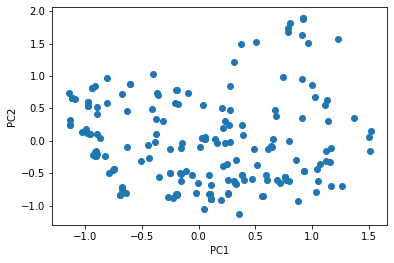

In [77]:
%matplotlib inline  

import matplotlib.pyplot as plt

Y = pca.transform(X)
plt.scatter(Y[:,0], Y[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Let's try to interpret this figure a bit more. Let's see where all the "Baathist" Arab countries lie on this plot:

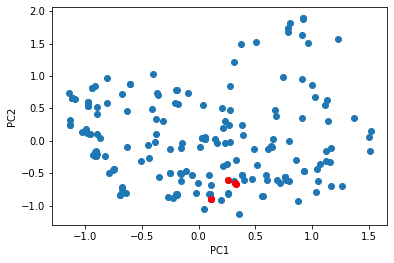

In [112]:
arab = ['Syria', 'Jordan', 'Kuwait', 'UAE']
arab_index = [list(flag.index.values).index(a) for a in arab]
plt.scatter(Y[:,0], Y[:,1])
plt.scatter(Y[arab_index,0], Y[arab_index,1],color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Or we can look at all of the countries in northern europe

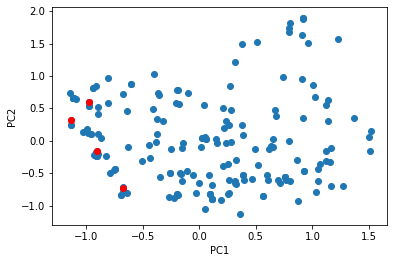

In [109]:
ne = ['Norway', 'Denmark', 'Finland', 'Iceland']
ne_index = [list(flag.index.values).index(a) for a in ne]
plt.scatter(Y[:,0], Y[:,1])
plt.scatter(Y[ne_index,0], Y[ne_index,1],color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Clustering
When we were playing around with the data we manually used data clusters that we roughly knew about to validate our model. How do we do this automatically? Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In particular, we will focus on a simple form of clustering called "k-means". k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

Again, the mathematical details are better left for a machine learning class but you can see how to use scikit-learn to do this:

In [118]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 15) #break the data into 15 clusters
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [120]:
flag[kmeans.labels_ == 9]

bars   stripes   colours  red  green  blue  gold  white  \
name                                                                            
American-Samoa         0.0  0.000000  0.571429  1.0    0.0   1.0   1.0    1.0   
Belize                 0.0  0.142857  1.000000  1.0    1.0   1.0   1.0    1.0   
British-Virgin-Isles   0.0  0.000000  0.714286  1.0    1.0   1.0   1.0    1.0   
Cayman-Islands         0.0  0.000000  0.714286  1.0    1.0   1.0   1.0    1.0   
Falklands-Malvinas     0.0  0.000000  0.714286  1.0    1.0   1.0   1.0    1.0   
Fiji                   0.0  0.000000  0.857143  1.0    1.0   1.0   1.0    1.0   
Guam                   0.0  0.000000  0.857143  1.0    1.0   1.0   1.0    1.0   
Hong-Kong              0.0  0.000000  0.714286  1.0    1.0   1.0   1.0    1.0   
Montserrat             0.0  0.000000  0.857143  1.0    1.0   1.0   1.0    1.0   
St-Helena              0.0  0.000000  0.857143  1.0    1.0   1.0   1.0    1.0   
Turks-Cocos-Islands    0.0  0.000000  0.714286  1.0    1.0   1.0   1.0    1.0   

                      black  orange  ...  animate  text  mainhue_green  \
name                                 ...                                 
American-Samoa          0.0     1.0  ...      1.0   0.0            0.0   
Belize                  1.0     1.0  ...      1.0   1.0            0.0   
British-Virgin-Isles    0.0     1.0  ...      1.0   1.0            0.0   
Cayman-Islands          0.0     1.0  ...      1.0   1.0            0.0   
Falklands-Malvinas      0.0     0.0  ...      1.0   1.0            0.0   
Fiji                    0.0     1.0  ...      1.0   0.0            0.0   
Guam                    0.0     1.0  ...      1.0   1.0            0.0   
Hong-Kong               0.0     1.0  ...      1.0   1.0            0.0   
Montserrat              1.0     0.0  ...      1.0   0.0            0.0   
St-Helena               0.0     1.0  ...      0.0   0.0            0.0   
Turks-Cocos-Islands     0.0     1.0  ...      1.0   0.0            0.0   

                      mainhue_red  mainhue_blue  mainhue_gold  mainhue_white  \
name                                                                           
American-Samoa                0.0           1.0           0.0            0.0   
Belize                        0.0           1.0           0.0            0.0   
British-Virgin-Isles          0.0           1.0           0.0            0.0   
Cayman-Islands                0.0           1.0           0.0            0.0   
Falklands-Malvinas            0.0           1.0           0.0            0.0   
Fiji                          0.0           1.0           0.0            0.0   
Guam                          0.0           1.0           0.0            0.0   
Hong-Kong                     0.0           1.0           0.0            0.0   
Montserrat                    0.0           1.0           0.0            0.0   
St-Helena                     0.0           1.0           0.0            0.0   
Turks-Cocos-Islands           0.0           1.0           0.0            0.0   

                      mainhue_orange  mainhue_black  mainhue_brown  
name                                                                
American-Samoa                   0.0            0.0            0.0  
Belize                           0.0            0.0            0.0  
British-Virgin-Isles             0.0            0.0            0.0  
Cayman-Islands                   0.0            0.0            0.0  
Falklands-Malvinas               0.0            0.0            0.0  
Fiji                             0.0            0.0            0.0  
Guam                             0.0            0.0            0.0  
Hong-Kong                        0.0            0.0            0.0  
Montserrat                       0.0            0.0            0.0  
St-Helena                        0.0            0.0            0.0  
Turks-Cocos-Islands              0.0            0.0            0.0  

[11 rows x 28 columns]

In [124]:
flag[kmeans.labels_ == 6]

bars   stripes   colours  red  green  blue  gold  white  black  \
name                                                                            
Albania         0.0  0.000000  0.285714  1.0    0.0   0.0   1.0    0.0    1.0   
Angola          0.0  0.142857  0.285714  1.0    0.0   0.0   1.0    0.0    1.0   
Bolivia         0.0  0.214286  0.285714  1.0    1.0   0.0   1.0    0.0    0.0   
Burkina         0.0  0.142857  0.285714  1.0    1.0   0.0   1.0    0.0    0.0   
China           0.0  0.000000  0.142857  1.0    0.0   0.0   1.0    0.0    0.0   
Congo           0.0  0.000000  0.285714  1.0    1.0   0.0   1.0    0.0    0.0   
Ghana           0.0  0.214286  0.428571  1.0    1.0   0.0   1.0    0.0    1.0   
Kampuchea       0.0  0.000000  0.142857  1.0    0.0   0.0   1.0    0.0    0.0   
Liechtenstein   0.0  0.142857  0.285714  1.0    0.0   1.0   1.0    0.0    0.0   
Mauritius       0.0  0.285714  0.428571  1.0    1.0   1.0   1.0    0.0    0.0   
Mongolia        0.6  0.000000  0.285714  1.0    0.0   1.0   1.0    0.0    0.0   
Rwanda          0.6  0.000000  0.428571  1.0    1.0   0.0   1.0    0.0    1.0   
Spain           0.0  0.214286  0.142857  1.0    0.0   0.0   1.0    0.0    0.0   
USSR            0.0  0.000000  0.142857  1.0    0.0   0.0   1.0    0.0    0.0   
Vietnam         0.0  0.000000  0.142857  1.0    0.0   0.0   1.0    0.0    0.0   

               orange  ...  animate  text  mainhue_green  mainhue_red  \
name                   ...                                              
Albania           0.0  ...      1.0   0.0            0.0          1.0   
Angola            0.0  ...      0.0   0.0            0.0          1.0   
Bolivia           0.0  ...      0.0   0.0            0.0          1.0   
Burkina           0.0  ...      0.0   0.0            0.0          1.0   
China             0.0  ...      0.0   0.0            0.0          1.0   
Congo             0.0  ...      1.0   0.0            0.0          1.0   
Ghana             0.0  ...      0.0   0.0            0.0          1.0   
Kampuchea         0.0  ...      0.0   0.0            0.0          1.0   
Liechtenstein     0.0  ...      0.0   0.0            0.0          1.0   
Mauritius         0.0  ...      0.0   0.0            0.0          1.0   
Mongolia          0.0  ...      0.0   0.0            0.0          1.0   
Rwanda            0.0  ...      0.0   1.0            0.0          1.0   
Spain             0.0  ...      0.0   0.0            0.0          1.0   
USSR              0.0  ...      0.0   0.0            0.0          1.0   
Vietnam           0.0  ...      0.0   0.0            0.0          1.0   

               mainhue_blue  mainhue_gold  mainhue_white  mainhue_orange  \
name                                                                       
Albania                 0.0           0.0            0.0             0.0   
Angola                  0.0           0.0            0.0             0.0   
Bolivia                 0.0           0.0            0.0             0.0   
Burkina                 0.0           0.0            0.0             0.0   
China                   0.0           0.0            0.0             0.0   
Congo                   0.0           0.0            0.0             0.0   
Ghana                   0.0           0.0            0.0             0.0   
Kampuchea               0.0           0.0            0.0             0.0   
Liechtenstein           0.0           0.0            0.0             0.0   
Mauritius               0.0           0.0            0.0             0.0   
Mongolia                0.0           0.0            0.0             0.0   
Rwanda                  0.0           0.0            0.0             0.0   
Spain                   0.0           0.0            0.0             0.0   
USSR                    0.0           0.0            0.0             0.0   
Vietnam                 0.0           0.0            0.0             0.0   

               mainhue_black  mainhue_brown  
name                                         
Albania   